# 1 Import Packages

In [1]:
import xarray as xr
import sys, os
from pathlib import Path
import glob
from cdo import Cdo
import matplotlib.pyplot as plt
import numpy as np
import logging

In [2]:
cdo = Cdo()

# 2 Metadata

In [3]:
sys.path.append(os.path.abspath(Path().resolve().parents[1]))
sys.path.append(os.path.abspath(Path().resolve().parents[0]))

import config
import utils as utils

In [4]:
experiment_family = "GrandEnsemble"
experiment = "hist"
realization = "lkm0001"

filename_dict = {}

filename_dict["experiment_family"] = experiment_family
filename_dict["experiment"] = experiment
filename_dict["realization"] = realization

# 3 Load Data

In [8]:
def gen_filename(filename_dict):
    if filename_dict["experiment_family"]=="GrandEnsemble":
        path = os.path.join(config.data_raw_path, filename_dict["experiment_family"], filename_dict["experiment"], filename_dict["realization"], "amoc")
        filename_template = "_".join([filename_dict["experiment_family"], filename_dict["experiment"], filename_dict["realization"], "amoc"])+"*.nc"        
        filename_list = glob.glob(os.path.join(path, filename_template))
        
        return filename_list[0]

In [34]:
def gen_all_filenames():
    experiment_family = "GrandEnsemble"
    experiment = "hist"
    filenames_dict = {}
    for i, realization_id in enumerate(np.arange(1,101)):
        realization = "lkm" + str(realization_id).zfill(4)

        filename_dict = {}
        filename_dict["experiment_family"] = experiment_family
        filename_dict["experiment"] = experiment
        filename_dict["realization"] = realization
        filename = gen_filename(filename_dict)
        filenames_dict[realization_id]= filename
    return filenames_dict

In [29]:
filenames_dict = gen_all_filenames()

lkm0001
True
lkm0002
True
lkm0003
True
lkm0004
True
lkm0005
True
lkm0006
True
lkm0007
True
lkm0008
True
lkm0009
True
lkm0010
True
lkm0011
True
lkm0012
True
lkm0013
True
lkm0014
True
lkm0015
True
lkm0016
True
lkm0017
True
lkm0018
True
lkm0019
True
lkm0020
True
lkm0021
True
lkm0022
True
lkm0023
True
lkm0024
True
lkm0025
True
lkm0026
True
lkm0027
True
lkm0028
True
lkm0029
True
lkm0030
True
lkm0031
True
lkm0032
True
lkm0033
True
lkm0034
True
lkm0035
True
lkm0036
True
lkm0037
True
lkm0038
True
lkm0039
True
lkm0040
True
lkm0041
True
lkm0042
True
lkm0043
True
lkm0044
True
lkm0045
True
lkm0046
True
lkm0047
True
lkm0048
True
lkm0049
True
lkm0050
True
lkm0051
True
lkm0052
True
lkm0053
True
lkm0054
True
lkm0055
True
lkm0056
True
lkm0057
True
lkm0058
True
lkm0059
True
lkm0060
True
lkm0061
True
lkm0062
True
lkm0063
True
lkm0064
True
lkm0065
True
lkm0066
True
lkm0067
True
lkm0068
True
lkm0069
True
lkm0070
True
lkm0071
True
lkm0072
True
lkm0073
True
lkm0074
True
lkm0075
True
lkm0076
True
lkm0077
True

In [31]:
data_arr = []
for filename_realization_id in filenames_dict.keys():
    filename = filenames_dict[filename_realization_id]
    data = xr.open_dataset(filename)
    data_arr.append(data.assign_coords({"realization_id": filename_realization_id}))


# Analyse

## Yearly Mean

In [81]:
data = xr.concat(data_arr, dim="realization_id")/(1025*10**6)

In [82]:
data_ys = data.resample(time="YS").mean()

## Climatology

In [86]:
data_ys_clim_mean = data_ys.mean(dim=("time","realization_id"))["atlantic_moc"]

In [84]:
data_ys_clim_std = data_ys.std(dim=("time","realization_id"))["atlantic_moc"]

/work/uo1075/u301101/programming/miniconda3/envs/CNN/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [87]:
lat = data.lat
depth = data.depth_2

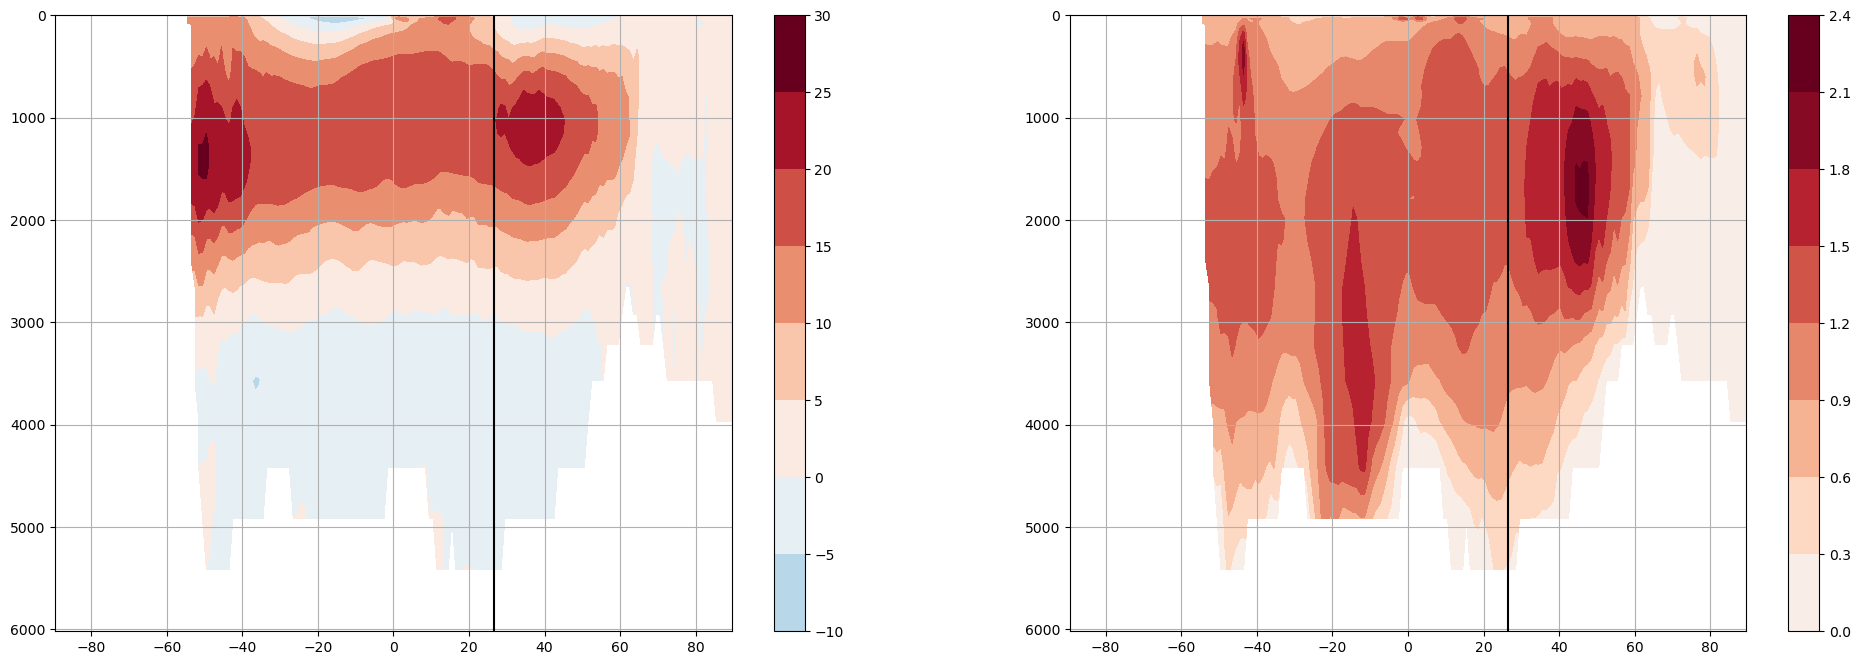

In [90]:
fig, ax  = plt.subplots(1,2,figsize=(24,8))

vmax = np.abs(data_ys_clim_mean).max()
plot = ax[0].contourf(lat,depth, data_ys_clim_mean.isel(lon=0), vmin=-vmax, vmax=vmax,  cmap = "RdBu_r")
ax[0].invert_yaxis()

ax[0].axvline(26.6, color="black")
ax[0].grid()
plt.colorbar(plot, ax = ax[0])


vmax = np.abs(data_ys_clim_std).max()
plot = ax[1].contourf(lat,depth, data_ys_clim_std.isel(lon=0), vmin=-vmax, vmax=vmax,  cmap = "RdBu_r")
ax[1].invert_yaxis()

plt.colorbar(plot, ax = ax[1])

ax[1].axvline(26.6, color="black")
ax[1].grid()


# Difference Maximum and constand depth

In [102]:
data_ys_lat_265_depth_1020 = data_ys.isel(lon=0).sel(lat=26.5).sel(depth_2=1020).stack(sample=("realization_id", "time"))["atlantic_moc"]

In [103]:
data_ys_lat_265_depth_max = data_ys.isel(lon=0).sel(lat=26.5).max(dim="depth_2").stack(sample=("realization_id", "time"))["atlantic_moc"]

In [109]:
data_ys_lat_265_depth_1020.std()

<xarray.DataArray 'atlantic_moc' ()>
array(1.32471234)
Coordinates:
    lon      float64 0.0
    lat      float64 26.5
    depth_2  float64 1.02e+03

In [107]:
data_ys_lat_265_depth_max.std()

<xarray.DataArray 'atlantic_moc' ()>
array(1.32813693)
Coordinates:
    lon      float64 0.0
    lat      float64 26.5

In [112]:
(data_ys_lat_265_depth_1020 - data_ys_lat_265_depth_max).std()

<xarray.DataArray 'atlantic_moc' ()>
array(0.02326943)
Coordinates:
    lon      float64 0.0
    lat      float64 26.5
    depth_2  float64 1.02e+03

(15.0, 25.0)

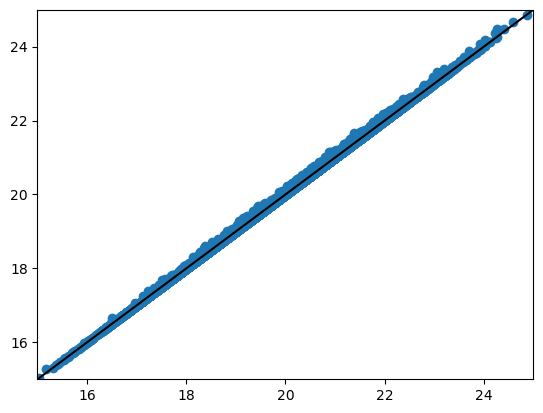

In [105]:
plt.scatter(data_ys_lat_265_depth_1020, data_ys_lat_265_depth_max)

x = np.arange(15,25+1)
plt.plot(x,x, color="black")

plt.xlim(15,25)
plt.ylim(15,25)